Creating RawArray with float64 data, n_channels=5, n_times=45773
    Range : 0 ... 45772 =      0.000 ... 45772.000 secs
Ready.
Creating RawArray with float64 data, n_channels=5, n_times=45773
    Range : 0 ... 45772 =      0.000 ... 45772.000 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up high-pass filter at 0.5 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal highpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Filter length: 7 samples (7.000 s)



[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s


Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 5 components
Fitting ICA took 0.1s.
Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components
Fitting ICA to data using 5 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 5 components
Fitting ICA took 0.1s.


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.3s finished
C:\Users\ahmad\AppData\Local\Temp\ipykernel_26084\3487020267.py:53: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica2.fit(raw2, picks=picks2)


Applying ICA to Raw instance
    Transforming to ICA space (5 components)
    Zeroing out 0 ICA components
    Projecting back using 5 PCA components


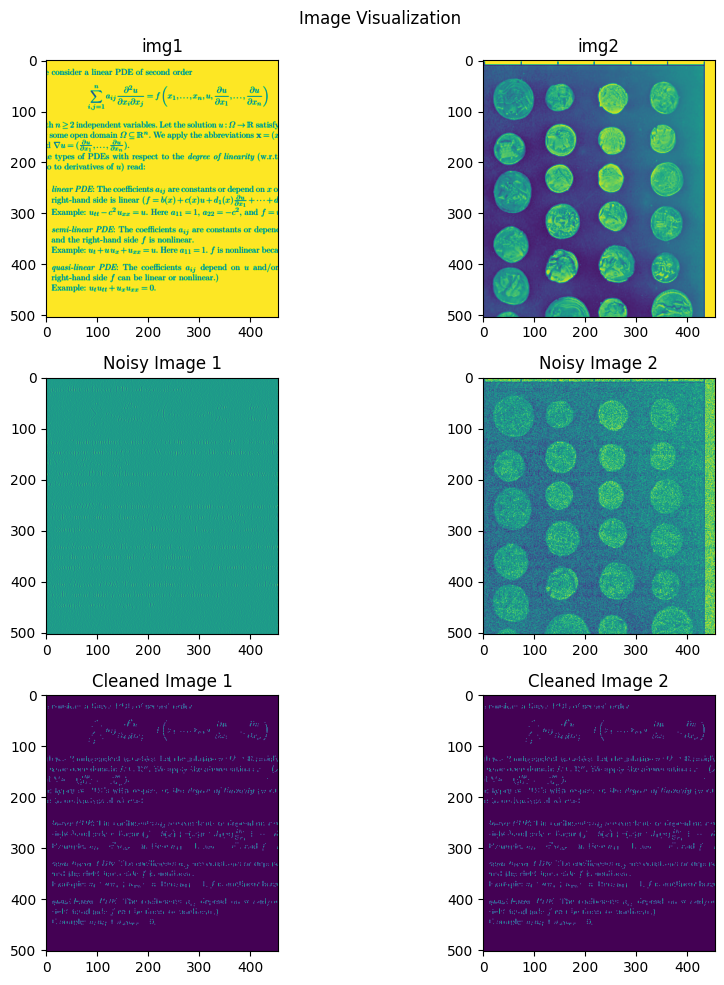

In [8]:
import numpy as np
import skimage.io
import mne
from mne.preprocessing import ICA
import matplotlib.pyplot as plt
from mne.viz import plot_raw

# Input images, mixing, and create noisy image
img1 = skimage.io.imread(r'C:/thesis/image1.png' ,as_gray=True)
img2 = skimage.io.imread(r'C:/thesis/image0.png' ,as_gray = True)
noise = np.random.uniform(9, 10, (503, 455))
noisy_img1 = 2*img1 +  0.2*img2 + noise
noisy_img2 = 0.3*img1 +  img2 + noise

# Flatenning the image data and distributing to 5 rows (5 channels)
num_rows = noisy_img1.shape[0] * noisy_img1.shape[1] // 5
num_columns = 5

# Reshape the data with 5 channels
reshaped_data = noisy_img1.reshape(num_columns, num_rows)
channel_names = ['ch1', 'ch2', 'ch3', 'ch4', 'ch5' ]


channel_names2 = ['ch6', 'ch7', 'ch8', 'ch9', 'ch10' ]

# Definechannel types
channel_types = ['mag'] * len(channel_names)  # Assuming 'eeg' as the channel type

# Define the sampling frequency
sfreq = 1  # Sampling frequency of 1000 Hz

# Create info for mne.raw
info = mne.create_info(channel_names, sfreq, ch_types=channel_types)
info2 = mne.create_info(channel_names2, sfreq, ch_types=channel_types)

# Create Raw object
raw = mne.io.RawArray(reshaped_data, info)
raw2 = mne.io.RawArray(reshaped_data, info2)
l_freq = 0.5
h_freq = None  # No upper bound
raw.filter(l_freq=l_freq, h_freq=h_freq)

#ICA
ica = ICA(method='fastica',max_iter=8000)
picks = np.arange(len(channel_names))  # Specify the channel indices to be used for ICA
ica.fit(raw, picks=picks)
ica.exclude = np.arange(len(channel_names), len(raw.ch_names))  # Exclude noise channels
raw_cleaned = raw.copy()
ica.apply(raw_cleaned)

ica2 = ICA(method='fastica',max_iter=8500)
picks2 = np.arange(len(channel_names2))  # Specify the channel indices to be used for ICA
ica2.fit(raw2, picks=picks2)
ica2.exclude = np.arange(len(channel_names2), len(raw2.ch_names))  # Exclude noise channels
raw_cleaned2 = raw2.copy()
ica2.apply(raw_cleaned2)

# Reshape to 2D again
reshaped_cleaned_data = raw_cleaned.get_data().reshape(noisy_img1.shape)
reshaped_cleaned_data2 = raw_cleaned2.get_data().reshape(noisy_img1.shape)

# Convert cleaned image 1 to integer
image_data1 = np.round(reshaped_cleaned_data).astype(np.uint8)

# Convert cleaned image 2 to integer
image_data2 = np.round(reshaped_cleaned_data2).astype(np.uint8)


# subplots
fig, axs = plt.subplots(3, 2, figsize=(10, 10))
fig.suptitle('Image Visualization')

# img1
axs[0, 0].imshow(img1)
axs[0, 0].set_title('img1')

# img2
axs[0, 1].imshow(img2)
axs[0, 1].set_title('img2')

# noisy_img1
axs[1, 0].imshow(noisy_img1)
axs[1, 0].set_title('Noisy Image 1')

# noisy_img1
axs[1, 1].imshow(noisy_img2)
axs[1, 1].set_title('Noisy Image 2')

# cleaned_data_1
axs[2, 0].imshow(image_data1)
axs[2, 0].set_title('Cleaned Image 1')

# cleaned_data_2
axs[2, 1].imshow(image_data2)
axs[2, 1].set_title('Cleaned Image 2')


plt.tight_layout()

# Show the plot
plt.show()